In [1]:
import os
import sys

In [2]:
#sys.path.insert(0, '/Users/marusy/Programming/another-fem-framework/')
#sys.path.insert(0, '/home/lshtanko/Programming/another-fem-framework/')
sys.path.insert(0, '/Users/leonshting/Programming/Schlumberger/fem-framework/')

In [3]:
import numpy as np
from interpolant.cell_to_points import Cell2PointsConverter
from interpolant.strict import StrictSolve
from interpolant.opt import OptSolve
from common.helpers import *
from interpolant.helpers import *
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
np.set_printoptions(linewidth=500)

In [7]:
c2p = Cell2PointsConverter(orders=[[3],[3,3]])

In [26]:
strict_solve = StrictSolve(points=c2p.get_points(), weights=c2p.get_diag_weights(), verbose=True)

In [27]:
strict_solve.fit_strict(max_power=strict_solve.get_max_pow(unrisky=True), method='sympy')

Number of equations: 11
Number of degrees of freedom: 28
Strictly stitched_power: 0
Start solving strict part
End solving strict part
NullspaceRank: 18


In [28]:
interps = strict_solve.get_interpolants()
wgths = strict_solve.get_weight_matrices()

In [29]:
opt_solve = OptSolve(matrices=interps,
                     points=c2p.get_points(),
                     strict_power=strict_solve.get_max_pow(unrisky=True),
                     weights_matrices=wgths,
                     verbose=True
                    )

In [30]:
opt_solve.fit_opt(constraints=True, tr_fun_option='chebyshev', orders_forwards=2)

In [99]:
opt_solve.restart_opt(tolerance=1e-3)

In [31]:
I_rl = np.array(opt_solve.I_rl_subbed).astype(np.float64)
I_lr = np.array(opt_solve.I_lr_subbed).astype(np.float64)

In [43]:
tr_f = np.vectorize(lambda x: (x-0.5)*x*(x-1))

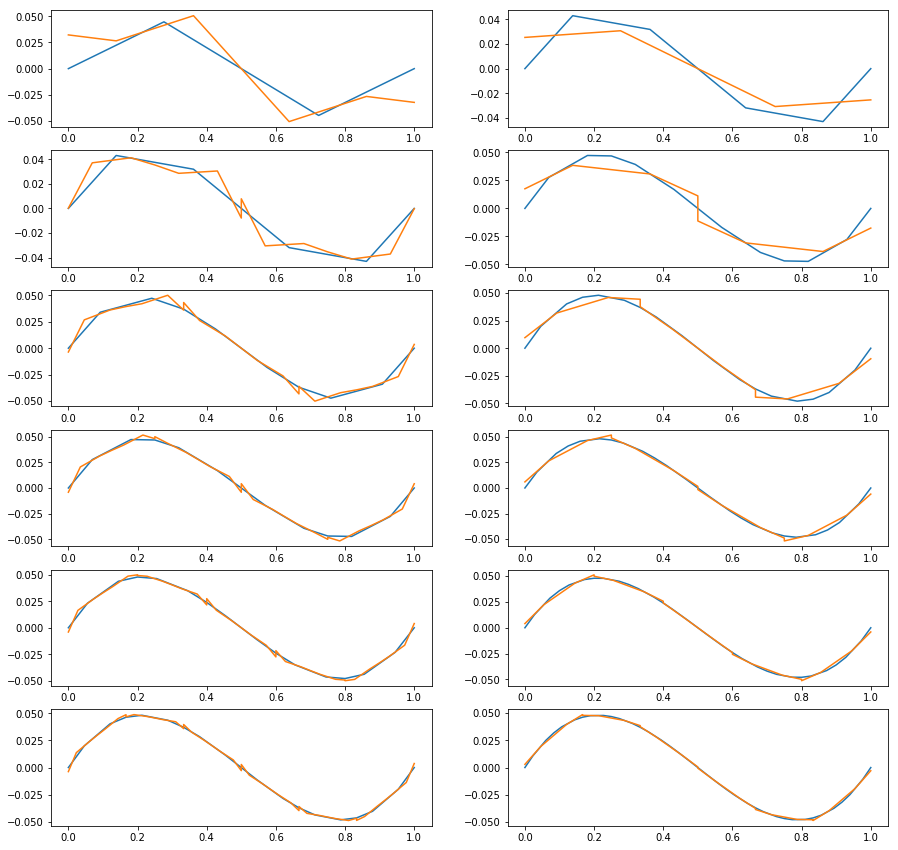

In [44]:
eps_l, eps_r = convergence_test(I_lr=new_int1,
                                I_rl=new_int2,
                                p_l=opt_solve.points[0],
                                p_r=opt_solve.points[1],
                                init_size=(0,1),
                                tr_f=tr_f,
                                weights=[np.array(strict_solve.W_l), np.array(strict_solve.W_r)],
                                div_lim=7)

In [ ]:
explosion_test(I_lr=I_lr,
               I_rl=I_rl,
               p_l=opt_solve.points[0],
               p_r=opt_solve.points[1],
               tr_f=tr_f,
               reps=3)

In [ ]:
plt.semilogy(range(len(eps_l)), eps_l)
plt.semilogy(range(len(eps_r)), eps_r)
plt.semilogy(np.linspace(0, len(eps_r)), float(eps_r[0])*np.exp(-np.linspace(0, len(eps_r))))
plt.semilogy(np.linspace(0, len(eps_r)), float(eps_r[0])*np.exp(-2*np.linspace(0, len(eps_r))))

In [40]:
np.linalg.eigvals(np.dot(new_int1, new_int2))

array([  5.73666370e-01,   7.90824519e-01,   9.94361897e-01,
         1.00000000e+00,  -7.53785673e-17,   1.72513272e-17,
         1.06841246e-16])

In [96]:
np.linalg.eigvals(np.dot(I_lr, I_rl))

array([  9.99861307e-01,   1.00000000e+00,   9.99935725e-01,
         5.19472713e-17,   2.60898774e-17])

In [33]:
new_int1 = (I_lr + I_lr[::-1,::-1])/2

In [34]:
new_int2 = (I_rl + I_rl[::-1, ::-1])/2

In [ ]:
c2p.get_weights()[0]

In [ ]:
np.dot(I_rl, c2p.get_weights()[1]).sum()

In [11]:
np.dot(np.dot(c2p.get_diag_weights()[1], new_int1), np.linalg.inv(c2p.get_diag_weights()[0])).T

array([[ 0.47913997,  0.64523337, -0.21919966,  0.02834773,  0.392656  , -0.39775605,  0.07157861],
       [ 0.03097077,  0.37368352,  0.51547025,  0.09433046, -0.05016151,  0.07682101, -0.04111449],
       [-0.04111449,  0.07682101, -0.05016151,  0.09433046,  0.51547025,  0.37368352,  0.03097077],
       [ 0.07157861, -0.39775605,  0.392656  ,  0.02834773, -0.21919966,  0.64523337,  0.47913997]])

In [12]:
new_int2

array([[ 0.47913998,  0.6452334 , -0.21919967,  0.02834773,  0.39265603, -0.39775608,  0.07157862],
       [ 0.03097077,  0.37368352,  0.51547025,  0.09433045, -0.05016152,  0.07682102, -0.04111448],
       [-0.04111448,  0.07682102, -0.05016152,  0.09433045,  0.51547025,  0.37368352,  0.03097077],
       [ 0.07157862, -0.39775608,  0.39265603,  0.02834773, -0.21919967,  0.6452334 ,  0.47913998]])

In [8]:
new_int2= np.array([[ 0.47913998,  0.6452334 , -0.21919967,  0.02834773,  0.39265603,
        -0.39775608,  0.07157862],
       [ 0.03097077,  0.37368352,  0.51547025,  0.09433045, -0.05016152,
         0.07682102, -0.04111448],
       [-0.04111448,  0.07682102, -0.05016152,  0.09433045,  0.51547025,
         0.37368352,  0.03097077],
       [ 0.07157862, -0.39775608,  0.39265603,  0.02834773, -0.21919967,
         0.6452334 ,  0.47913998]])

In [9]:
new_int1 = np.array([[ 0.95827995,  0.30970766, -0.41114484,  0.14315723],
       [ 0.25809336,  0.74736704,  0.15364203, -0.15910243],
       [-0.08767987,  1.03094049, -0.10032303,  0.15706241],
       [ 0.02834773,  0.47165227,  0.47165227,  0.02834773],
       [ 0.15706241, -0.10032303,  1.03094049, -0.08767987],
       [-0.15910243,  0.15364203,  0.74736704,  0.25809336],
       [ 0.14315723, -0.41114484,  0.30970766,  0.95827995]])

In [38]:
new_int1

array([[ 0.95827995,  0.30970766, -0.41114484,  0.14315723],
       [ 0.25809336,  0.74736704,  0.15364203, -0.15910243],
       [-0.08767987,  1.03094049, -0.10032303,  0.15706241],
       [ 0.02834773,  0.47165227,  0.47165227,  0.02834773],
       [ 0.15706241, -0.10032303,  1.03094049, -0.08767987],
       [-0.15910243,  0.15364203,  0.74736704,  0.25809336],
       [ 0.14315723, -0.41114484,  0.30970766,  0.95827995]])

In [39]:
new_int2

array([[ 0.47913998,  0.6452334 , -0.21919967,  0.02834773,  0.39265603,
        -0.39775608,  0.07157862],
       [ 0.03097077,  0.37368352,  0.51547025,  0.09433045, -0.05016152,
         0.07682102, -0.04111448],
       [-0.04111448,  0.07682102, -0.05016152,  0.09433045,  0.51547025,
         0.37368352,  0.03097077],
       [ 0.07157862, -0.39775608,  0.39265603,  0.02834773, -0.21919967,
         0.6452334 ,  0.47913998]])